# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [235]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, ttest_ind
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [236]:
#Code:
sat_2017_df = pd.read_csv('../data/sat_2017.csv')
act_2017_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [237]:
#Code:
sat_2017_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [238]:
act_2017_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:  

The SAT dataset consists of 5 columns: State, Participation, Evidence-based Reading and Writing (ERW), Math, and Total. Total is the sum of the Math and ERW scores. The shape of the dataset is (51,5). Each row is an observation of test scores of each state.

The ACT dataset consists of 7 columns: State, Participation, English, Math, Reading, Science, and Composite, which is an aggregate of the 4 scores rather than just the sum. The shape of the dataset is (52,7). The extra row compared to the SAT dataset contains data at the national level in addition to the 51 states. 

The datasets are complete with no missing values present. Preliminary exploration shows that the lowest Math score obtained in the SAT is 52, which should not be possible. This is most likely an error in data entry. The minimum score for Science in the ACT is 2.3, significantly lower than the minimum scores for other components. We will check these values later to confirm if they are erroneous.

There are 17 states which have 100% participation rates for the ACT, as compared to 4 states for the SAT. This indicates that the ACT is generally more popular within the US.


#### 4a. Does the data look complete? 

Answer: Yes, no missing values are present.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT 2020](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)
- [ACT 2017](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)

Answer: 

The minimum and maximum scores for the SAT subtests are 200 and 800 respectively. The minimum and maximum scores for the ACT subtests are 1 and 36 respectively. 

The minimum SAT score for Math is 52, in Maryland, which is not possible. This is probably a data entry error. 

The minimum ACT score for Science is 2.3, also in Maryland, which is significantly lower than other ACT subtest minimum scores. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.
***
We identified 2 erroneous scores for Maryland earlier. We can set the correct values by checking with the data source.

In [239]:
# set the appropriate values using the .loc method
sat_2017_df.loc[sat_2017_df['Math'] == sat_2017_df['Math'].min(), 'Math'] = 524
sat_2017_df[sat_2017_df['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [240]:
act_2017_df.loc[act_2017_df['Science'] == act_2017_df['Science'].min(), 'Science'] = 23.2
act_2017_df[act_2017_df['State'] == 'Maryland']


,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [241]:
#code
display(sat_2017_df.dtypes)
act_2017_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

Participation in both datasets should ideally be float64, as they are percentages.

Composite in ACT 2017 should be float64 like the other numerical columns, but isn't. There is likely some value in there preventing the column from being cast as float64.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [242]:
# generic function that strips away the % sign and divides the value by 100 to obtain a participation rate between 0 and 1.
def convert_to_float(num):
    return float(num.replace('%',''))/100

In [243]:
act_2017_df['Participation'] = act_2017_df['Participation'].apply(convert_to_float)
sat_2017_df['Participation'] = sat_2017_df['Participation'].apply(convert_to_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [244]:
# there was an 'x' character causing the entire column to be cast as a string, so let's remove it.
act_2017_df['Composite'] = act_2017_df['Composite'].str.replace('x', '')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [245]:
# after removing the 'x' we can recast the column's datatype to float.
act_2017_df['Composite'] = act_2017_df['Composite'].astype('float')

- Display the data types again to confirm they are correct.

In [246]:
#Code:
display(sat_2017_df.dtypes)
display(act_2017_df.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [247]:
# this function takes a dataframe's columns, appends a prefix to them, and outputs a list with new column names.
# we conveniently add in a check to change 'Evidence-based Reading and Writing' to the shorter 'erw' instead.
# we also lowercase the column names to standardize things.
# as a sanity check, we check if we have already given our columns the intended prefix, to avoid double prefixing them.
def col_renamer(cols, prefix):
    new_cols = list(cols)
    if new_cols[1].startswith(prefix):
        print("Columns already renamed with given prefix")
        return cols
    for n, col in enumerate(new_cols):
        if 'evidence' in col.lower():
            new_cols[n] = 'erw'
    new_cols = [(prefix + col).lower() if col !='State' else col.lower() for col in new_cols]
    new_cols = [col.replace(' ','_') for col in new_cols]

    return new_cols

new_sat_cols = col_renamer(sat_2017_df.columns, 'sat_2017_')
new_sat_cols

['state',
 'sat_2017_participation',
 'sat_2017_erw',
 'sat_2017_math',
 'sat_2017_total']

In [248]:
# we set our new column names using the output of our function
sat_2017_df.columns = new_sat_cols
# double check that it worked properly
sat_2017_df.columns

Index(['state', 'sat_2017_participation', 'sat_2017_erw', 'sat_2017_math',
       'sat_2017_total'],
      dtype='object')

In [249]:
# repeat for the ACT columns
new_act_cols = col_renamer(act_2017_df.columns, 'act_2017_')
act_2017_df.columns = new_act_cols
act_2017_df.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite'],
      dtype='object')

In [250]:
display(sat_2017_df.head())
act_2017_df.head()

,state,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT_2017/ACT_2017|State that scores were taken from.|
|**sat_2017_participation**|*float*|SAT_2017|Percentage of students in the state that take the SAT.
|**sat_2017_erw**|*integer*|SAT_2017|Average score obtained in the Evidence-based Reading and Writing subtest.
|**sat_2017_math**|*integer*|SAT_2017|Average score obtained in the Math subtest.
|**sat_2017_total**|*integer*|SAT_2017|Average total score obtained in the SAT, as the sum of the ERW and Math subtests.
|**act_2017_participation**|*float*|ACT_2017|Percentage of students in the state that take the ACT.
|**act_2017_english**|*float*|ACT_2017|Average score obtained in the English subtest.
|**act_2017_math**|*float*|ACT_2017|Average score obtained in the Math subtest.
|**act_2017_reading**|*float*|ACT_2017|Average score obtained in the Math subtest.
|**act_2017_science**|*float*|ACT_2017|Average score obtained in the Science subtest.
|**act_2017_composite**|*float*|ACT_2017|Composite score obtained across all 4 subtests.

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [251]:
# find the extra row
act_2017_df[~act_2017_df['state'].isin(sat_2017_df['state'])]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [252]:
# we did not need to manually drop the extra row earlier because merging using 
# an inner join will automatically drop rows that are not present in both dataframes.
combined_2017 = sat_2017_df.merge(act_2017_df, on='state')
combined_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   sat_2017_participation  51 non-null     float64
 2   sat_2017_erw            51 non-null     int64  
 3   sat_2017_math           51 non-null     int64  
 4   sat_2017_total          51 non-null     int64  
 5   act_2017_participation  51 non-null     float64
 6   act_2017_english        51 non-null     float64
 7   act_2017_math           51 non-null     float64
 8   act_2017_reading        51 non-null     float64
 9   act_2017_science        51 non-null     float64
 10  act_2017_composite      51 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [253]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [254]:
# read in the files into dataframes.
sat_2018_df = pd.read_csv('../data/sat_2018.csv')
act_2018_df = pd.read_csv('../data/act_2018_updated.csv')

In [255]:
# take a quick look at our data
display(sat_2018_df.head())
act_2018_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [256]:
display(sat_2018_df.info())
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [257]:
# sat_2018_df records Participation as object, similar to the initial sat_2017 dataset. we will set this to float instead.
# do the same for act_2018_df by dividing by 100 since the column is already of dtype int.

sat_2018_df['Participation'] = sat_2018_df['Participation'].apply(convert_to_float)
act_2018_df['Percentage of Students Tested'] = act_2018_df['Percentage of Students Tested']/100

In [258]:
# confirm our changed dtypes
display(sat_2018_df.info())
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [259]:
# rename columns of each dataframe so they follow the format of the 2017 dataframes.
# start with sat_2018_df
new_cols_sat_2018 = col_renamer(sat_2018_df.columns, 'sat_2018_')
sat_2018_df.columns = new_cols_sat_2018
sat_2018_df.columns

Index(['state', 'sat_2018_participation', 'sat_2018_erw', 'sat_2018_math',
       'sat_2018_total'],
      dtype='object')

In [260]:
# act_2018_df requires a bit more work as the column format differs significantly from the 2017 version
# first move the Average Composite Score to the last column position
act_2018_col_reordered = [col for col in act_2018_df.columns if col != 'Average Composite Score']+['Average Composite Score']
act_2018_df = act_2018_df[act_2018_col_reordered]
act_2018_df.head()

,State,Percentage of Students Tested,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


In [261]:
# set the columns to follow the act_2017_df column format by taking the 2017 ACT columns name and replacing the year.
new_cols_act_2018 = list(map(lambda x: x.replace('2017','2018'), act_2017_df.columns))
act_2018_df.columns = new_cols_act_2018
act_2018_df.columns

Index(['state', 'act_2018_participation', 'act_2018_english', 'act_2018_math',
       'act_2018_reading', 'act_2018_science', 'act_2018_composite'],
      dtype='object')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [262]:
combined_2018 = sat_2018_df.merge(act_2018_df, on='state')
final = combined_2017.merge(combined_2018, on='state')
# let's make sure everything looks nice
final.head()

,state,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,0.05,592,576,1169,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.60,540,536,1076,0.27,22.5,22.5,23.0,22.1,22.7


In [263]:
# saving using index=False ensures our CSV does not get saved with an unnecessary index column.
final.to_csv('../data/final.csv', index=False)

In [264]:
# final = pd.read_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [265]:
#Code:
final.describe()

,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,20.988235,21.125490,22.015686,21.345098,21.486275
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.446356,2.035765,2.167245,1.870114,2.106278
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [266]:
# manual standard deviation calculation
def std(col, df):
    mu = sum(df[col])/len(df[col])
    sum_of_squares = sum([(x-mu)**2 for x in df[col]])
    std = (sum_of_squares/len(df[col]))**0.5
    return std
std('sat_2017_participation', final)

0.3492907076664507

In [267]:
# double check against numpy's std function
np.std(final['sat_2017_participation'])

0.3492907076664507

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [268]:
#Code:
sd = {col: std(col, final) for col in final.columns if col !='state'}
sd

{'sat_2017_participation': 0.3492907076664507,
 'sat_2017_erw': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_participation': 0.3694661922353942,
 'sat_2018_erw': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433,
 'act_2018_participation': 0.33745194881997503,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'act_2018_composite': 2.0855261815801147}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

The manually calculated standard deviations match numpy's std method but not pandas'. This is because pandas calculates standard deviation using n-1 degrees of freedom, whereas numpy and our own manual calculation uses n degrees of freedom.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [269]:
#code
# investigate highest and lowest participation rates.
# start with 2017 SAT by using min() and max() to set a boolean mask, and subsetting on state and participation columns.
# to make this process repeatable, define a function to do the above.
def min_max_part(col, df):
    min_part = df[df[col] == df[col].min()]\
                [['state', col]]
    max_part = df[df[col] == df[col].max()]\
                [['state', col]]
    return min_part, max_part
sat_2017_min_part, sat_2017_max_part = min_max_part('sat_2017_participation', final)
display(sat_2017_min_part)
sat_2017_max_part 

,state,sat_2017_participation
15,Iowa,0.02
24,Mississippi,0.02
34,North Dakota,0.02


,state,sat_2017_participation
6,Connecticut,1.0
7,Delaware,1.0
8,District of Columbia,1.0
22,Michigan,1.0


The 3 states with the lowest participation rates in the 2017 SAT are Iowa, Mississipi, and North Dakota, at 2% participation.

The 4 states with the highest participation rates in the 2017 SAT are Connecticut, Delaware, District of Columbia, and Michigan, at 100% participation rate.

In [270]:
# do the same for 2018 SAT
sat_2018_min_part, sat_2018_max_part = min_max_part('sat_2018_participation', final)
display(sat_2018_min_part)
sat_2018_max_part 

,state,sat_2018_participation
34,North Dakota,0.02


,state,sat_2018_participation
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
12,Idaho,1.0
22,Michigan,1.0


The state with the lowest participation rate in the 2018 SAT is North Dakota, at 2% participation.

The 5 states with the highest participation rates in the 2018 SAT are Connecticut, Delaware, Colorado, Idaho, and Michigan, at 100% participation rate.

In [271]:
# do the same for 2017 ACT
act_2017_min_part, act_2017_max_part = min_max_part('act_2017_participation', final)
display(act_2017_min_part)
act_2017_max_part 

,state,act_2017_participation
19,Maine,0.08


,state,act_2017_participation
0,Alabama,1.0
3,Arkansas,1.0
5,Colorado,1.0
17,Kentucky,1.0
18,Louisiana,1.0
23,Minnesota,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
28,Nevada,1.0


There are 17 states with a 100% participation in the 2017 ACT, outlined in the table above.
Maine has the lowest participation at 8%.

In [272]:
# and again for 2018 ACT
act_2018_min_part, act_2018_max_part = min_max_part('act_2018_participation', final)
display(act_2018_min_part)
act_2018_max_part 

,state,act_2018_participation
19,Maine,0.07


,state,act_2018_participation
0,Alabama,1.0
3,Arkansas,1.0
17,Kentucky,1.0
18,Louisiana,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
27,Nebraska,1.0
28,Nevada,1.0
33,North Carolina,1.0


There are once again 17 states with a 100% participation in the 2018 ACT, outlined above. 

Once again, Maine is the state with the lowest ACT participation at 7%.

In [273]:
# find the highest and lowest total/composite scores, starting with 2017 SAT again.
# once again we define a function to help us do this.
def top_btm_scores(col, df, n=3):
    """
    col = column in the dataframe you want to get the top and btm values for.
    df = dataframe
    n = to return top/btm n scores.
    """
    top = df[['state', col]].sort_values(by=col, ascending=False).head(n)
    btm = df[['state', col]].sort_values(by=col).head(n)
    return top, btm
top_3_sat_2017, btm_3_sat_2017 = top_btm_scores('sat_2017_total', final)
display (top_3_sat_2017)
btm_3_sat_2017

,state,sat_2017_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275


,state,sat_2017_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005


In [274]:
# do the same for 2018 SAT
top_3_sat_2018, btm_3_sat_2018 = top_btm_scores('sat_2018_total', final)
display (top_3_sat_2018)
btm_3_sat_2018

,state,sat_2018_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283


,state,sat_2018_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999


SAT 2017: The top scoring state is Minnesota with an average total of 1295. The lowest scoring state is DC with an average total of 950.
SAT 2018: The top scoring state is once again MN with an average total of 1298. The lowest scoring state is once again DC with an average total of 977.

In [275]:
# Repeat for the 2017 and 2018 ACT average composite scores
top_3_act_2017, btm_3_act_2017 = top_btm_scores('act_2017_composite', final)
top_3_act_2018, btm_3_act_2018 = top_btm_scores('act_2018_composite', final)
display(top_3_act_2017)
display(btm_3_act_2017)
display(top_3_act_2018)
btm_3_act_2018

,state,act_2017_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2


,state,act_2017_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7


,state,act_2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1


,state,act_2018_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6


ACT 2017: The top scoring state is New Hampshire with an average composite of 25.5 The lowest scoring state is Nevada with an average composite score of 17.8.

ACT 2018: The top scoring state is Connecticut with an average composite of 25.5. The lowest scoring state is once again Nevada with an average composite score of 17.7

In [276]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
# examine first states with 100% participation in 2017 SAT and compare with their participation rate in 2018.
final.loc[final['sat_2017_participation']== 1.0, ['state', 'sat_2017_participation', 'sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
6,Connecticut,1.0,1.00
7,Delaware,1.0,1.00
8,District of Columbia,1.0,0.92
22,Michigan,1.0,1.00


In [277]:
# how about the other way? states who had 100% participation in 2018 SAT but not in 2017?
final.loc[final['sat_2018_participation']== 1.0, ['state', 'sat_2017_participation', 'sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
5,Colorado,0.11,1.0
6,Connecticut,1.00,1.0
7,Delaware,1.00,1.0
12,Idaho,0.93,1.0
22,Michigan,1.00,1.0


We see that DC had 100% participation in 2017, but dropped to 92% the next year. Conversely, Idaho had 93% participation in 2017, and increased to 100% the next year.

Interestingly, we see Colorado had an extremely low participation rate of 11% in 2017, but jumped to 100% the next year. This indicates some level of state-wide adoption of SAT being introduced, possibly by the board of education.

In [278]:
# let's look at the same info for ACT all at once now by using relational bool filters.
# this code looks for either condition being true, but NOT BOTH at the same time.
final.loc[(final['act_2017_participation']== 1.0) != (final['act_2018_participation']== 1.0), 
          ['state', 'act_2017_participation', 'act_2018_participation']]

,state,act_2017_participation,act_2018_participation
5,Colorado,1.00,0.30
23,Minnesota,1.00,0.99
27,Nebraska,0.84,1.00
35,Ohio,0.75,1.00


Nebraska and Ohio both increased their participation from 2017 to 2018. Minnesota only dropped 1% in participation.

The interesting observation here is Colorado, which as we saw earlier, saw their SAT participation jump from 11% to 100%. This is accompanied by a drastic fall in their ACT participation, from 100% to 30%, indicating that many students elected to take the SAT instead of the ACT this year.

In [279]:
# Do any states show have >50% participation on both tests either year?
# It makes sense for a state to standardize taking only either the SAT or ACT but not both, 
# so let's examine states for which this does not seem to hold. Start with 2017.
final[(final['sat_2017_participation'] > 0.5) & (final['act_2017_participation'] > 0.5)]\
            [['state', 'sat_2017_participation', 'act_2017_participation']]

,state,sat_2017_participation,act_2017_participation
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [280]:
# Now 2018
final[(final['sat_2018_participation'] > 0.5) & (final['act_2018_participation'] > 0.5)]\
            [['state', 'sat_2018_participation', 'act_2018_participation']]

,state,sat_2018_participation,act_2018_participation
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


We see Florida, Georgia, and Hawaii all having more than 50% participation in both tests in both years.

North and South Carolina join them in 2018, and interestingly their ACT participation immediately jumps from below 50% to 100% too. In all these states there are evidently students taking both tests, for whatever reasons.

### What are some interesting trends observed?

There are 2 states in particular that showed interesting trends. The first is Colorado, which saw their SAT and ACT participation rates 'swap' between 2017 and 2018. As their SAT participation jumped to 100%, their average total fell from 1201 to 1025. Conversely, their ACT scores rose from 20.8 to 23.9 as ACT participation fell. Possibly the smarter students are the ones taking both tests, and so the tests which see less participation overall in a given year might be selectively taken by smarter students in general, leading to higher scores on those tests for those years.

The other state is North Dakota, which stood out because while they consistently had the lowest SAT participation, ND actually scored in the top 3 states in the 2018 SATs, and was also a high scorer in the 2017 SATs. This is rather peculiar, and suggests that perhaps only the very best students in ND are selectively taking the SATs because they know they can do well, thus leading to ND's low participation rates and high scores. In contrast, ND has a high participation rate in the ACTs, yet their ACT composite scores are average at best.

In [281]:
final.loc[(final['state'] == 'Colorado') | (final['state'] == 'North Dakota')]\
                                        [['state', 'sat_2017_participation','sat_2017_total',
                                         'sat_2018_participation', 'sat_2018_total',
                                         'act_2017_participation','act_2017_composite',
                                         'act_2018_participation', 'act_2018_composite']]

,state,sat_2017_participation,sat_2017_total,sat_2018_participation,sat_2018_total,act_2017_participation,act_2017_composite,act_2018_participation,act_2018_composite
5,Colorado,0.11,1201,1.00,1025,1.00,20.8,0.30,23.9
34,North Dakota,0.02,1256,0.02,1283,0.98,20.3,0.98,20.3


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

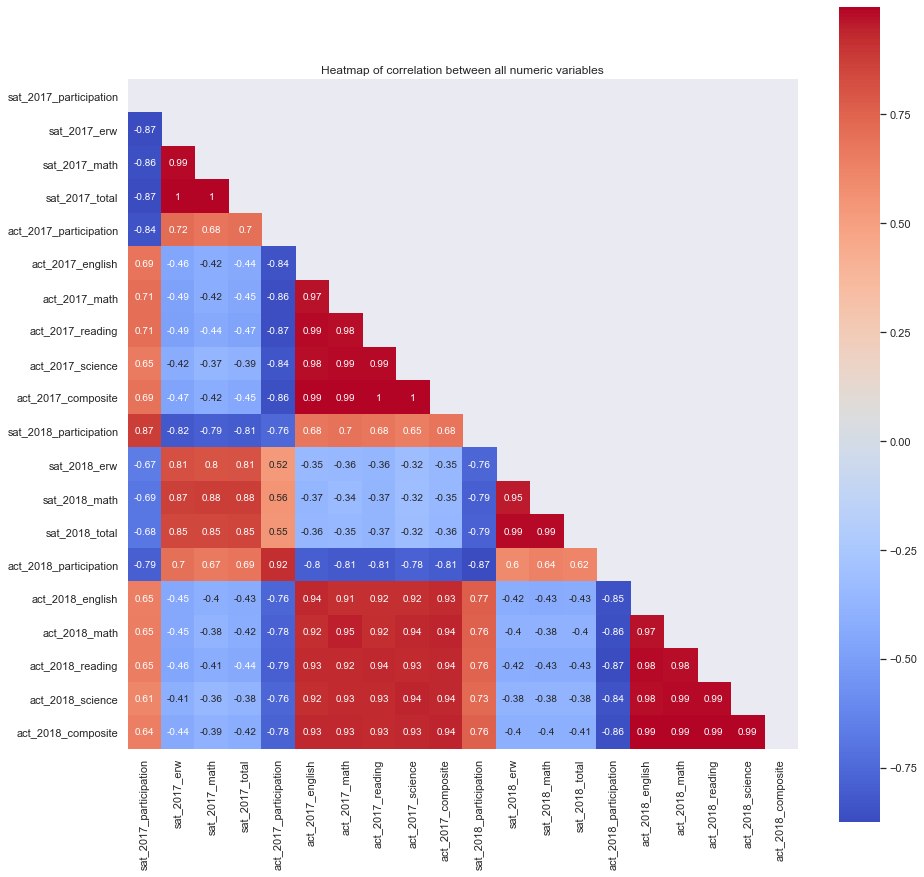

In [282]:
fig, ax = plt.subplots(figsize=(15,15))
corr = final.corr()
mask = np.zeros_like(corr)
# set a mask so that we hide all the symmetric values. They don't give us any extra information
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, square=True, cmap='coolwarm')
plt.title('Heatmap of correlation between all numeric variables');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [283]:
sns.set()
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, bins=10, figsize=(18,10)):
    nrows = int(np.ceil(len(list_of_columns)/2))                  # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):                  # Gives us an index value to get into all our lists
        g = sns.histplot (dataframe[column], bins=bins, ax=ax[i], kde=True) # feel free to add more settings
        g.set_title(list_of_titles[i], fontsize=15)
        g.set_xlabel(list_of_xlabels[i])
        g.axvline(dataframe[column].median(),0,1, color='r', linestyle='dashed', label='Median') # draws a line on the median
        g.axvline(dataframe[column].mean(),0,1, color='black', linestyle='dashed', label = 'Mean') # draws a line on the mean
        g.legend()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

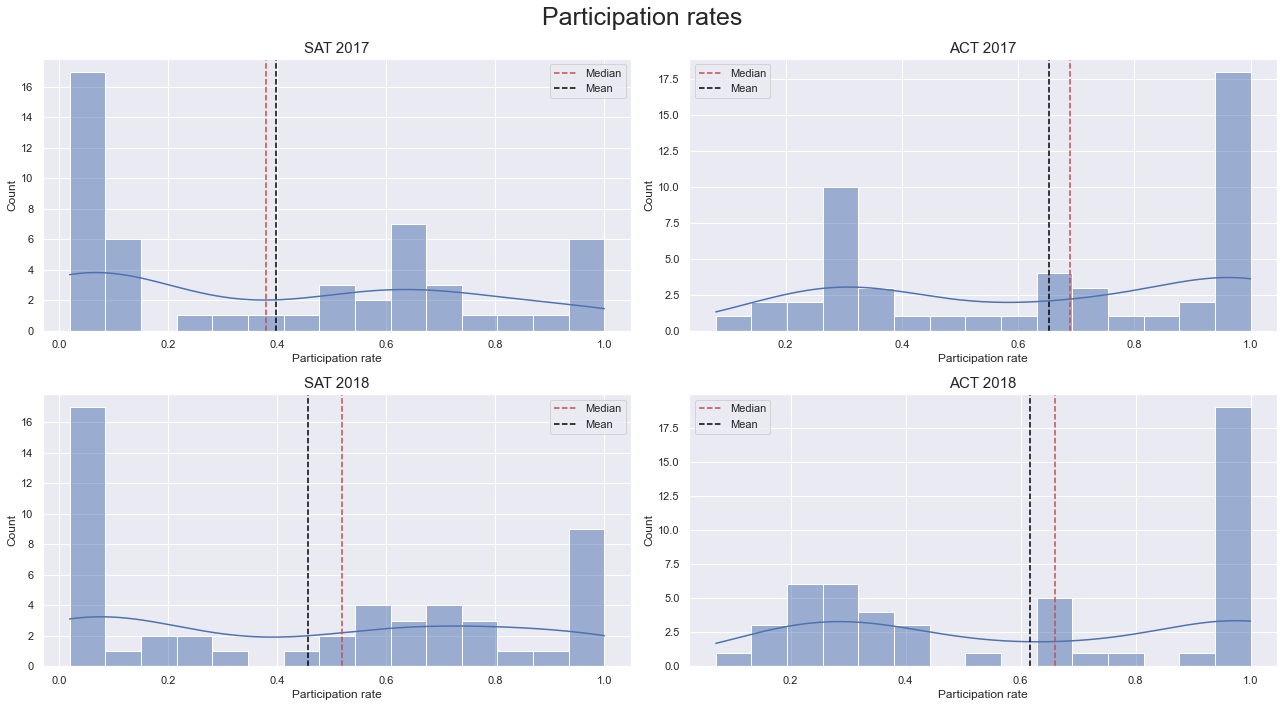

In [284]:
# plot participation rates
subplot_histograms(final, ['sat_2017_participation', 'act_2017_participation',
                           'sat_2018_participation', 'act_2018_participation'],
                    ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018'],
                    ['Participation rate','Participation rate', 'Participation rate', 'Participation rate' ], bins=15)

plt.suptitle('Participation rates', fontsize=25);
plt.tight_layout();

The distribution of SAT participation rates is heavier towards the bottom end, while ACT participation rates heavier towards the top. In both cases, the distributions all display bimodality.

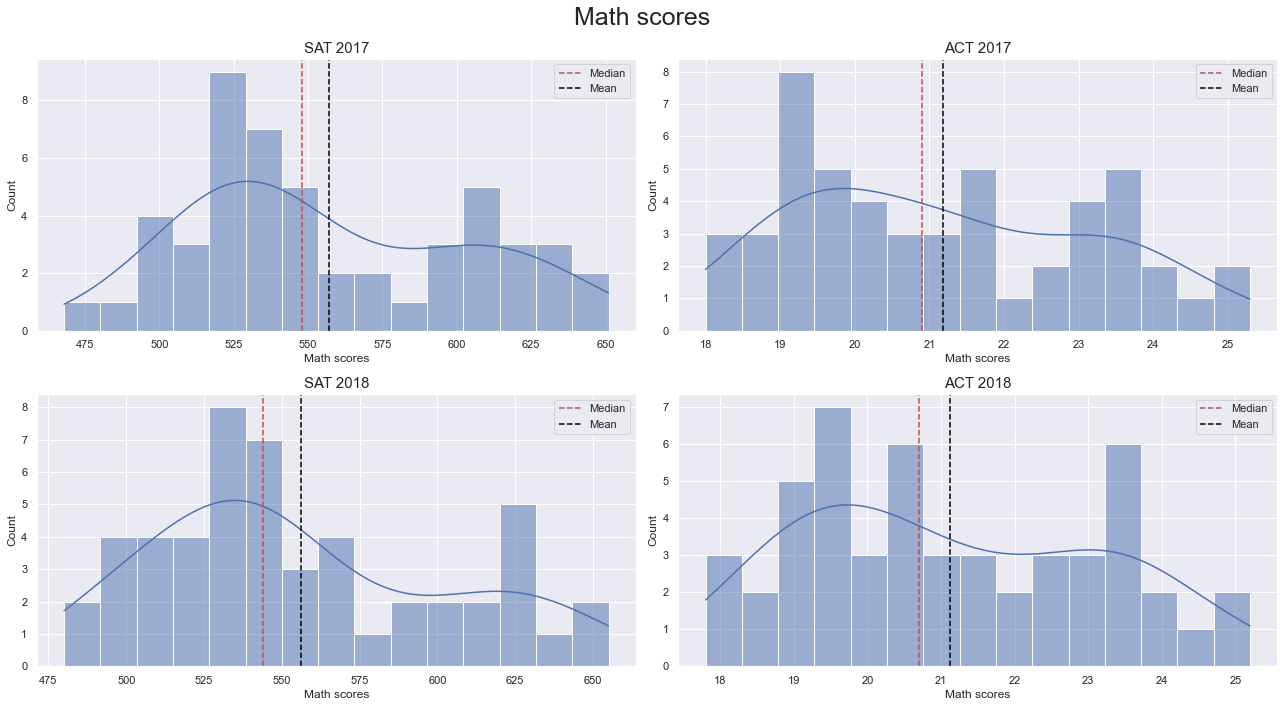

In [285]:
# plot math scores
subplot_histograms(final, ['sat_2017_math', 'act_2017_math',
                           'sat_2018_math', 'act_2018_math'],
                    ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018'],
                    ['Math scores', 'Math scores', 'Math scores', 'Math scores'], bins=15)
plt.suptitle('Math scores', fontsize=25);
plt.tight_layout();

The distributions all contain more mass towards the lower end, and like above, they all display signs of bimodality.

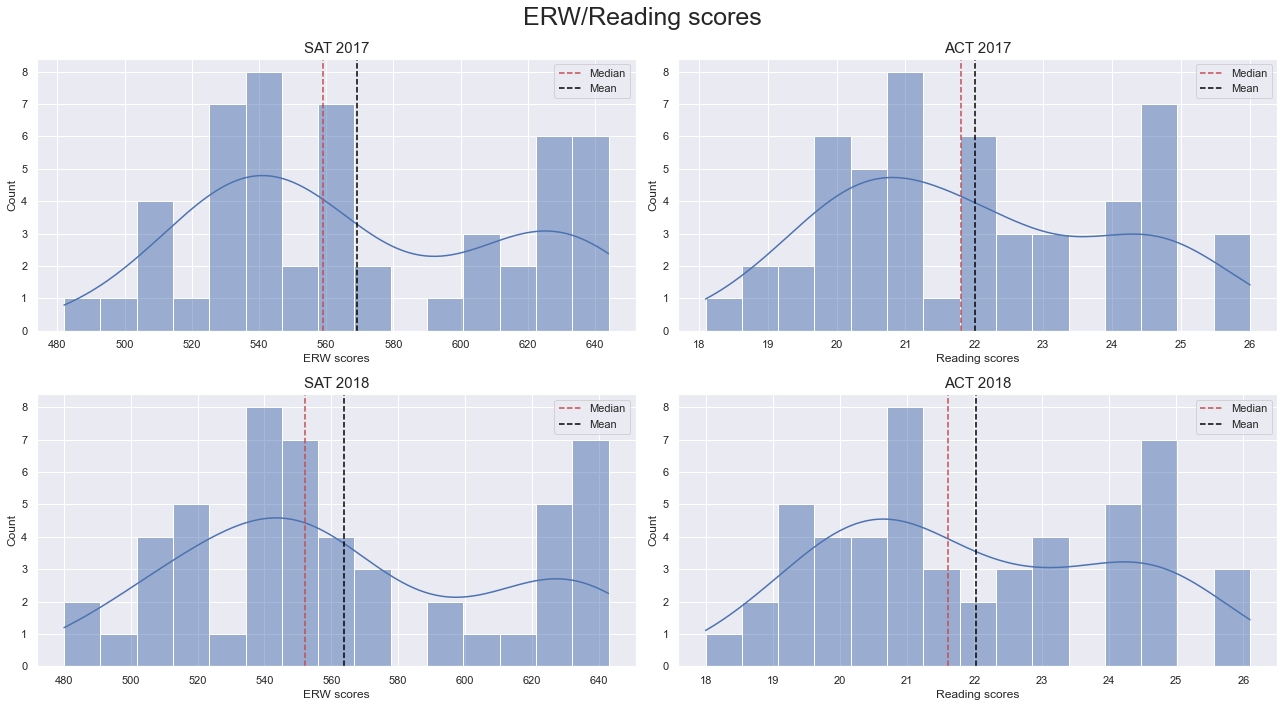

In [286]:
# plot ERW/Reading scores
subplot_histograms(final, ['sat_2017_erw', 'act_2017_reading',
                           'sat_2018_erw', 'act_2018_reading'],
                    ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018'],
                    ['ERW scores', 'Reading scores', 'ERW scores', 'Reading scores'], bins=15)
plt.suptitle('ERW/Reading scores', fontsize=25);
plt.tight_layout();

Similar to the math scores, the distributions here contain more mass towards the low end and display bimodality.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


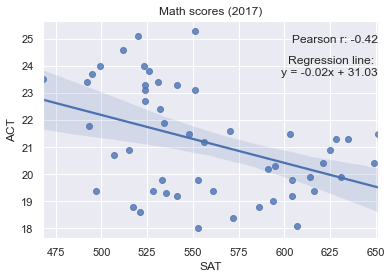

In [287]:
# we use a regression plot here to visualize the strength, slope, and direction of correlation between our variables
def scatter_plot_reg(df, x_col, y_col, text_loc=[1, 0.9]):
    slope, intercept = np.polyfit(df[x_col], df[y_col], 1) # get coefficients for the regression line
    g = sns.regplot(data=df, x=x_col, y=y_col)
    # calculates the Pearson correlation coefficient and # labels it on the graph
    g.text(text_loc[0], text_loc[1], 'Pearson r: {:.2f}'\
           .format(np.corrcoef(df[x_col],df[y_col])[0,1]), 
           transform=g.transAxes, ha='right')
    # labels the regression equation 
    g.text(text_loc[0], text_loc[1]-0.15, 'Regression line: \ny = {:.2f}x + {:.2f}'\
           .format(slope, intercept), transform=g.transAxes, ha='right')
    return g
scatter_plot_reg(final, 'sat_2017_math', 'act_2017_math')
plt.xlabel('SAT')
plt.ylabel('ACT')
plt.title('Math scores (2017)');

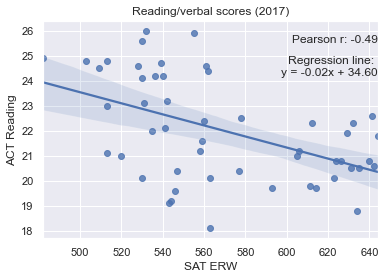

In [288]:
scatter_plot_reg(final,'sat_2017_erw', 'act_2017_reading')
plt.xlabel('SAT ERW')
plt.ylabel('ACT Reading')
plt.title('Reading/verbal scores (2017)');

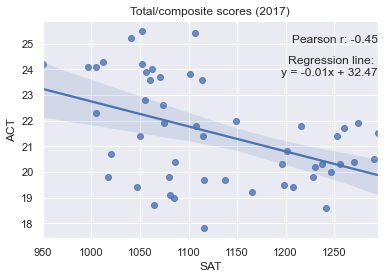

In [289]:
scatter_plot_reg(final,'sat_2017_total', 'act_2017_composite')
plt.xlabel('SAT')
plt.ylabel('ACT')
plt.title('Total/composite scores (2017)');

Each subject is moderately negatively correlated to its SAT/ACT counterpart.

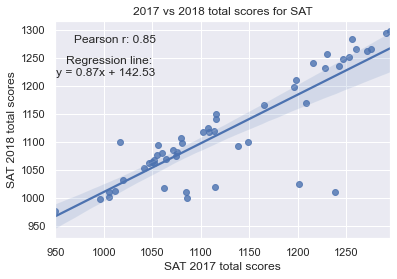

In [290]:
scatter_plot_reg(final,'sat_2017_total', 'sat_2018_total', text_loc=[0.3,0.9])
plt.xlabel('SAT 2017 total scores')
plt.ylabel('SAT 2018 total scores')
plt.title('2017 vs 2018 total scores for SAT');

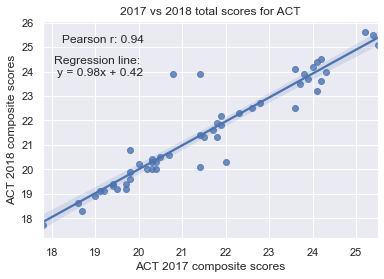

In [291]:
scatter_plot_reg(final,'act_2017_composite', 'act_2018_composite', text_loc=[0.3,0.9])
plt.xlabel('ACT 2017 composite scores')
plt.ylabel('ACT 2018 composite scores')
plt.title('2017 vs 2018 total scores for ACT');

As expected, total/composite scores SAT/ACT are highly positively correlated between 2017 and 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [292]:
# simple function to plot boxplots, which allows for color and size management
def box_plotter(df, list_of_cols, figsize=None, palette=None):
    fig, ax = plt.subplots(figsize=figsize)
    g = sns.boxplot(data=df[list_of_cols], ax=ax, palette=palette)
    return g 

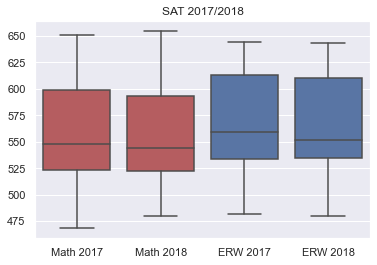

In [293]:
# plot SAT test scores
g = box_plotter(final, ['sat_2017_math', 'sat_2018_math', 'sat_2017_erw', 'sat_2018_erw'],
                       palette = ['r','r','b','b']) # set colors by subject
g.set_xticklabels(['Math 2017', 'Math 2018', 'ERW 2017', 'ERW 2018'])
plt.title('SAT 2017/2018');

The median score for ERW tests in the SAT tends to be higher than that for Maths. While the IQR of each subject's score between years is similar, the range for Math scores seems to be larger than ERW scores, indicating more spread.

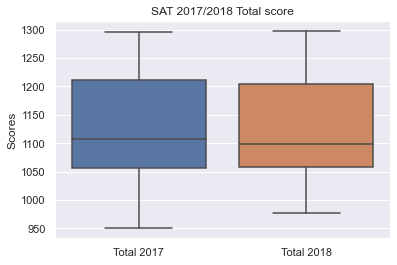

In [294]:
g = box_plotter(final, ['sat_2017_total', 'sat_2018_total'])
g.set_xticklabels(['Total 2017', 'Total 2018'])
plt.ylabel('Scores')
plt.title('SAT 2017/2018 Total score');

The distribution of scores remained largely stable across 2017 and 2018 - the median and IQR for both years' total score is very similar.

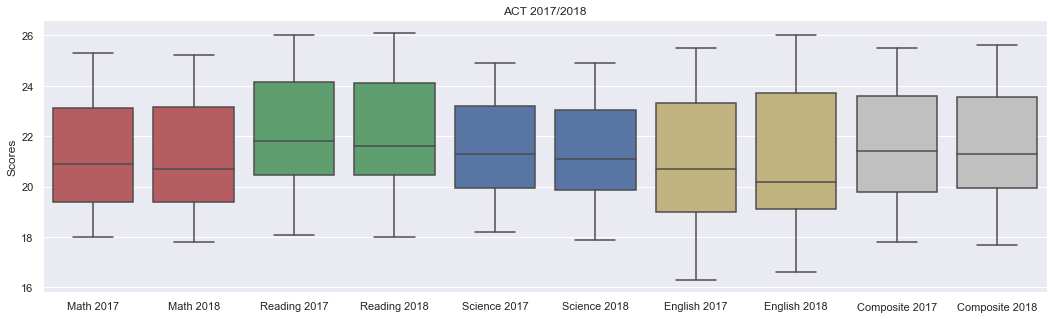

In [295]:
# get all the ACT test score columns to plot
cols = ['act_2017_math', 'act_2018_math', 'act_2017_reading', 'act_2018_reading',
     'act_2017_science','act_2018_science',  'act_2017_english','act_2018_english',
     'act_2017_composite', 'act_2018_composite']
# set colors by subject
my_palette = {col:'r' if 'math' in col else 'g' if 'reading' in col else 'b' if 'science' in col \
              else 'y' if 'english' in col else 'silver' for col in cols}
g = box_plotter(final, cols, figsize=(18,5), palette = my_palette)
g.set_xticklabels(['Math 2017', 'Math 2018', 'Reading 2017', 'Reading 2018',
                    'Science 2017','Science 2018', 'English 2017', 'English 2018', 'Composite 2017', 'Composite 2018'])
plt.title('ACT 2017/2018');
plt.ylabel('Scores');

We see that the median and IQR of each subject remains quite stable between 2017 and 2018. The English test has the lowest overall median and largest IQR, indicating the most spread. The Reading test has the highest overall median scores, while the Science test shows the smallest IQR, hence smallest spread.

Similar to the SAT, the distribution for the composite score remains quite stable between 2017 and 2018.

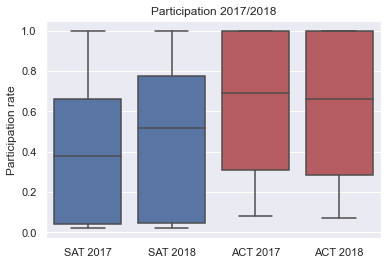

In [296]:
cols = ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation']
my_palette = {col:'b' if 'sat' in col else 'r' for col in cols} # set colors by SAT or ACT

g = box_plotter(final, cols, palette = my_palette)
g.set_xticklabels(['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'])
plt.title('Participation 2017/2018')
plt.ylabel('Participation rate');

On average, the participation rate for the SAT is much lower than that for the ACT, but as we saw earlier, a number of states saw their SAT participation rate jump to 100% in 2018, and this increase is reflected in the higher median of the 2018 SAT vs the 2017 SAT. The spread for 2018 SAT also increased significantly.

The IQR for the SAT participation rates sits closer to the bottom, while the IQR for ACT rates sits closer to the top.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

As we saw above, North Dakota displayed an inverse relationship between test participation and test scores. That is, they performed better on the test that they participated less in. Let's examine the relationship between participation and test scores for both SAT and ACT as a whole using a regression plot.

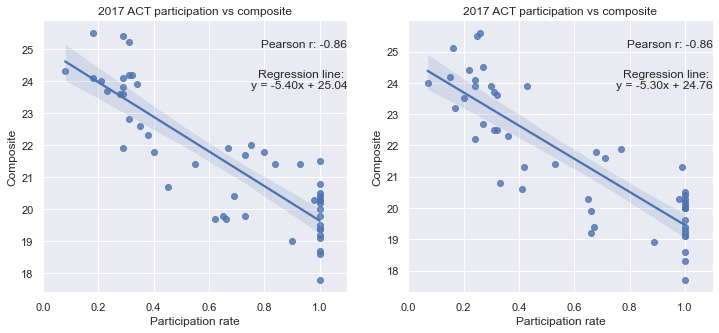

In [297]:
def two_scatter_plots(df, first_plot_col, second_plot_col, title_list, label_list):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    for n, plot in enumerate([first_plot_col, second_plot_col]):
        g = sns.regplot(data = df ,x=plot[0], y=plot[1], ax=ax[n])
        ax[n].set_xlim(0.0, 1.1)
        ax[n].set_title(title_list[0])
        ax[n].set_xlabel(label_list[0]), ax[n].set_ylabel(label_list[1])
        
        slope, intercept = np.polyfit(df[plot[0]], df[plot[1]], 1)
        corr1 = np.corrcoef(df[plot[0]], df[plot[1]])
        
        ax[n].text(1,0.9, 'Pearson r: {:.2f}'.format(corr1[0,1]), transform=ax[n].transAxes, ha='right')
        ax[n].text(1,0.75, 'Regression line: \ny = {:.2f}x + {:.2f}'.format(slope, intercept),
                   transform=ax[n].transAxes, ha='right')
        
two_scatter_plots(final, ['act_2017_participation', 'act_2017_composite'],
                         ['act_2018_participation', 'act_2018_composite'],
                         ["2017 ACT participation vs composite","2018 ACT participation vs composite"],
                         ['Participation rate', 'Composite'])

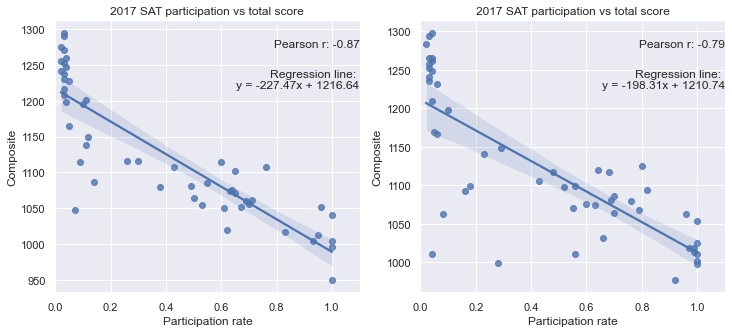

In [298]:
two_scatter_plots(final, ['sat_2017_participation', 'sat_2017_total'],
                         ['sat_2018_participation', 'sat_2018_total'],
                         ["2017 SAT participation vs total score","2018 SAT participation vs total score"],
                         ['Participation rate', 'Composite'])

The results suggest a strong, negative correlation between participation and total/composite scores for both SAT and ACT.
___
As we saw in some states, participation rates for the two tests appears to be negatively correlated. Let's examine this.

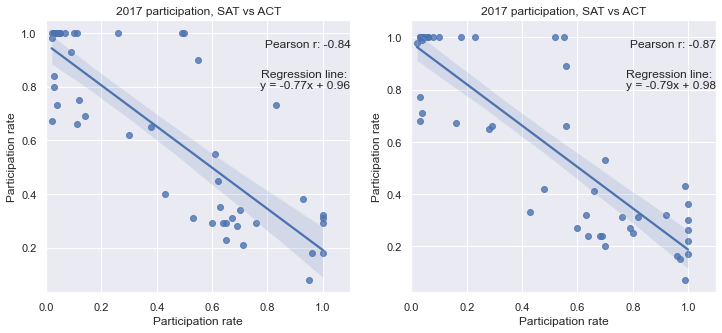

In [299]:
two_scatter_plots(final, ['sat_2017_participation', 'act_2017_participation'],
                         ['sat_2018_participation', 'act_2018_participation'],
                         ["2017 participation, SAT vs ACT","2017 participation, SAT vs ACT"],
                         ['Participation rate', 'Participation rate']);
# plt.savefig('./images/sat_vs_act_part.png');

As shown, participation rates for each test are negatively correlated with each other, as most students would generally only take one or the other. Of course, as we've seen in some states, there are students who actually elect to take both.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [300]:
# map us state names to their 2 letter abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [301]:
import plotly.graph_objects as go
# create a temporary df to avoid messing up our working dataframe
temp = final[['state','sat_2018_participation','act_2018_participation']].copy()
# create a new state code column
temp['code'] = temp['state'].map(lambda x: us_state_abbrev[x])
# this column will help color code our states. more SAT-centric states will sit above 0, more ACT-centric states sit below 0.
temp['diff'] = temp['sat_2018_participation'] - temp['act_2018_participation']
# set the text that we want to appear for our hover tooltip
temp['text'] = temp['state'] + '<br>'+ 'SAT rate: ' + temp['sat_2018_participation'].astype(str) + '<br>' \
                + 'ACT rate: ' + temp['act_2018_participation'].astype(str) + '<br>'
temp['text']
fig = go.Figure(data=go.Choropleth(
    locations=temp['code'], # Spatial coordinates
    z = temp['diff'], # Data to be color-coded,
    text = temp['text'], # uses our text column to feed the text for the hover tooltip
    hovertemplate = temp['text'], # makes our tooltip more readable
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'RdBu', # sets the colorscale so that Blue represent SAT states, Red for ACT states
    # set color bar parameters
    colorbar = {'tickmode':'array', 'tickvals':[-0.8,0.8], 'ticktext':['ACT more popular','SAT more popular']}
))

fig.update_layout(
    title_text = 'SAT vs ACT (2018) participation rates',
    title_x=0.5,
    geo_scope='usa', # limit map scope to USA
)
fig.show()
# plt.savefig('./images/part_choropleth_2018')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [302]:
# select out SAT variables
sat_2017_stats = final.describe().T[:4]
sat_2018_stats = final.describe().T[10:14]
sat_stats = pd.concat([sat_2017_stats, sat_2018_stats]).iloc[:,1:]

In [303]:
# calculate skew 
sat_stats['skewness'] = [skew(final[var], bias=False) for var in sat_stats.index]
# calculate kurtosis
sat_stats['kurtosis'] = [kurtosis(final[var], bias=False) for var in sat_stats.index]
# display our summary statistic table
sat_stats

,mean,std,min,25%,50%,75%,max,skewness,kurtosis
sat_2017_participation,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0,0.346450,-1.380695
sat_2017_erw,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0,0.272693,-1.220371
sat_2017_math,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0,0.365040,-0.925843
sat_2017_total,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0,0.310903,-1.105461
sat_2018_participation,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0,0.136228,-1.569003
sat_2018_erw,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0,0.282300,-1.055118
sat_2018_math,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0,0.530407,-0.756126
sat_2018_total,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0,0.466432,-1.022725


We observe that the mean, median, and spread (as measured by standard deviation) are all largely stable across both years. [Using the histograms we plotted earlier](#Plot-and-interpret-histograms), we know that these distributions are not normally distributed, are heavier towards the bottom end and that they display bimodality. The skew values we obtain for these distributions are small. The negative kurtosis values also indicate that the tails of these distributions are shorter than that of a normal distribution, and this is because our data is bounded on each end. Participation rate must be between 0 and 1 inclusive, and the scores for the subtests range from 200-800. 

Examining the participation rate reveals a more interesting observation which we touched upon when we [created our boxplots](#Plot-and-interpret-boxplots). Participation significantly increased from 2017 to 2018, as shown by the median increasing from 38% to 52%. Furthermore, we observe from the histograms that there are many values that congregate on the bottom end of the distribution. The bottom 25% of all states had a participation rate of *less than 4% and 4.5%* respectively for 2017 and 2018. 

In [304]:
# select out ACT variables
act_2017_stats = final.describe().T[4:10]
act_2018_stats = final.describe().T[14:]
act_stats = pd.concat([act_2017_stats, act_2018_stats]).iloc[:,1:]

In [305]:
# calculate skew
act_stats['skewness'] = [skew(final[var], bias=False) for var in act_stats.index]
# calculate kurtosis
act_stats['kurtosis'] = [kurtosis(final[var], bias=False) for var in act_stats.index]
# dipslay our table
act_stats

,mean,std,min,25%,50%,75%,max,skewness,kurtosis
act_2017_participation,0.652549,0.321408,0.08,0.310,0.69,1.00,1.0,-0.197989,-1.631970
act_2017_english,20.931373,2.353677,16.30,19.000,20.70,23.30,25.5,0.352660,-0.879307
act_2017_math,21.182353,1.981989,18.00,19.400,20.90,23.10,25.3,0.332683,-0.979210
act_2017_reading,22.013725,2.067271,18.10,20.450,21.80,24.15,26.0,0.269366,-0.982094
act_2017_science,21.450980,1.739353,18.20,19.950,21.30,23.20,24.9,0.218823,-0.956033
act_2017_composite,21.519608,2.020695,17.80,19.800,21.40,23.60,25.5,0.319810,-0.983524
act_2018_participation,0.616471,0.340810,0.07,0.285,0.66,1.00,1.0,-0.021916,-1.738681
act_2018_english,20.988235,2.446356,16.60,19.100,20.20,23.70,26.0,0.371507,-1.071710
act_2018_math,21.125490,2.035765,17.80,19.400,20.70,23.15,25.2,0.269548,-1.109059
act_2018_reading,22.015686,2.167245,18.00,20.450,21.60,24.10,26.1,0.201361,-1.116031


We observe that the mean, median, and spread (as measured by standard deviation) are all largely stable across both years. From our histograms we can see that the distributions are not normal, and display signs of bimodality even. The skew value we obtain for each of these distributions is small. The ACT test score distributions are heavier towards the low end, while the participation rate distribution is heavier towards the upper end.  Another observation is that there is English scores exhibit more variation and Science scores exhibit less variation than the rest of the scores. The negative kurtosis values also indicate that the tails of these distributions are shorter than that of a normal distribution, and this is because our data is bounded on each end. Participation rate must be between 0 and 1 inclusive, and the scores for the subtests range from 1-36. 

We also observe a slight drop in the mean and median rates from 2017 to 2018, which is consistent with SAT participation rates increasing, since students are not likely to want to take both tests.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
No, we do not

Does This Assumption Hold for:

    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

To assume a sampling distribution's normality we must apply the Central Limit Theorem. A key assumption of the CLT is that samples are randomly taken from the underlying population. However, since in this case, each sample is drawn by taking each state as a sample, this is no longer random. Thus, we cannot apply the Central Limit Theorem to these distributions. Furthermore, as each state has different student population size, each sample then has a different sample size, further adding to the variability of our distribution.

As such, we cannot be confident about the estimates we get from the data.

Finally, a quick check back to [our histograms](#Plot-and-interpret-histograms) also clearly shows that these distributions are not normal.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: 
Here is the regression plot for participation rates again.

![](./images/sat_vs_act_part.png)

Although the Pearson correlation is quite high, we cannot conclusively prove that one causes the other. It is more likely that participation in either of these tests is mandated by local state educational policy. In fact, that is what happened in [Colorado when the State decided to switch from using the ACT to the SAT](https://co.chalkbeat.org/2015/12/23/21092477/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers). Additionally, participation may be mediated by other variables such as median income levels, which we do not have data about.

A further problem is that the data we have for each state's participation rate has already been aggregated at the state level, meaning we lose all the information about the distribution within a given state. The data does not have sufficient resolution for us to perform any robust inference. The optimal solution for this would be to actually randomly sample students from across the entire country.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

It would not be appropriate or useful to compare these specific scores. The SAT and ACT math tests are tested differently and use a different grading scheme. As such, there is no 1-to-1 relationship between them. For instance, there is no meaning in comparing an SAT score of 650 to a ACT score of 23.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Answer:

Earlier on we discussed how making inferences from our data would not be appropriate because we cannot apply the CLT. However, for argument's sake, let's try to examine whether or not SAT participation rates higher in 2018 than 2017 anyway.

While the median participation rate of the SAT increased in 2018 due to more states mandating and/or providing funding for it, we cannot say for sure if such measures have had a statistically significant impact on participation rates for the SAT. Let's examine this by conducting a 2-sample t-test on the 2017 and 2018 SAT participation rates. 

Let $H_\theta$ be: mean participation rate of 2018 SAT = mean participation rate of 2017 SAT.

Let $H_A$ be: mean participation rate of 2018 SAT > mean participation rate of 2017 SAT.

Our alpha shall be $\alpha$ = 0.05.

In [306]:
# conduct a 2-sample t test
ttest_ind(final['sat_2017_participation'], final['sat_2018_participation'], equal_var=False)

Ttest_indResult(statistic=-0.8262650776952397, pvalue=0.4106269778595497)

Scipy's ttest_ind() calculates the $p$-value for a 2-tailed test. Since we want a 1-tailed test, we divide $p$ by 2, obtaining $p = 0.21$. As the p-value we obtained is more than our $\alpha$ value, we are unable to reject the null hypothesis, and conclude that there is insufficient evidence to prove that the mean participation rate of 2018 SAT is greater than the mean participation rate of 2017 SAT.

Of course, as mentioned above, this test is probably not reliable anyway.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

[Colorado](https://www.testive.com/colorado-sat-change-2017/) made the SAT mandatory in for their 2018 class, which accounts for their 100% participation in 2018. Another state that demonstrated a similar participation trend is [Illinois](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html), which awarded the College Board a 3 year contract to administer the SATs after their previous contract with ACT ended. [Connecticut, Delaware, and Michigan](https://blog.prepscholar.com/which-states-require-the-sat) are some examples of states that already made the tests mandatory prior to 2017. 

|state	|sat_2017_participation		|act_2017_participation	|sat_2018_participation|act_2018_participation|
|---|---|---|---|---|
|Colorado	|0.11	|1.00	|1.00	|0.30|
|Illinois   |0.09	|0.93	|0.99	|0.43|

Another factor that supports this uptake of SAT is that it is [sponsored by the state](https://www.collegeraptor.com/getting-in/articles/act-sat/states-act-sat-given-free/), which makes the SAT equally accessible to everyone. The [SAT School Day](https://reports.collegeboard.org/archive/sat-suite-program-results/2018/sat-school-day) makes taking the test even easier by reducing the logistical considerations involved.

Ohio actually saw both its SAT and ACT participation rate increase when the state [mandated that all juniors be tested with either test](https://www2.ed.gov/admins/lead/account/stateplan17/ohconsolidatedstateplan.pdf). In 2017, the total participation rate across both tests was less than 100%, indicating that not everyone was being tested. In 2018, every student took the ACT, and some even took the SAT as well. We note that when given a choice between the SAT and ACT, more students preferred taking the ACT.

|state	|sat_2017_participation		|act_2017_participation	|sat_2018_participation|act_2018_participation|
|---|---|---|---|---|
|Ohio	|0.12	|0.75|0.18	|1.0|

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Answer:

We have seen that a state-wide policy regarding the mandatary use of the SAT or ACT remains the biggest factor that motivates participation in these tests. Often, states will choose one test or the other to make mandatory. Additionally, the states that do mandate these tests often also provide financial and logistical help that increase the accessibility of these tests to everyone. It is a fact that these tests can often be expensive to take, both in terms of time and money, thereby selectively excluding lower-income students. By having these tests be sponsored by the state, and by having arrangements be made for students to take these tests on school days, at their own school, as shown by programs like the SAT School Day, these tests can be made equally accessible to all students, allowing for maximum participation.

An example of a state that has low SAT participation and also does not have any state-wide mandation of SAT or ACT as of 2018 is [Arizona.](https://www.azcentral.com/story/news/local/arizona-education/2017/12/26/house-bill-2037-proposes-free-sat-and-act-tests-all-arizona-juniors-azmerit/977487001/) Students take the AzMERIT, Arizona's own college-readiness exam. However, there is already talk in the state about legislating funding to make taking the SAT and ACT free for students. This represents a prime opportunity for the College Board to discuss with state regulators as to how they can incentivize participation in the SAT. 

|state	|sat_2017_participation	|sat_2018_participation|	act_2017_participation|	act_2018_participation|
|---|---|---|---|---|
|Arizona	|0.30	|0.29	|0.62|0.66|

**Our recommendations** would be for the College Board to explore how they can work with regulators keep costs low so that the state can sponsor all students, and whether or not implementing a SAT School Day will be feasible in Arizona. Additionally, one key consideration states have with not just funding these tests, but also mandating them as some states have done, is whether or not these tests are a suitable replacement for existing state-level assessments. As Arizona already has its own [AzMERIT](https://www.azcentral.com/story/news/politics/arizona-education/2018/02/26/arizona-high-school-students-testing-options-azmerit-sat-act-ap-cambridge/373497002/), the College Board should further study how the SAT could be a suitable alternative to it. If regulators can be convinced of the SAT's merit, they would be more inclined to drop their own AzMERIT as it represents significant cost savings by not having to administer so many tests. Students would also benefit from not having to study for 2 separate tests, easing their workload.

Naturally, with Covid-19 was sweeping the world in 2020, taking these tests becomes very difficult. In view of public health considerations and students' wellbeing, [many universities have dropped SAT and ACT requirements.](https://www.cbsnews.com/news/act-and-sat-no-longer-required-college-admissions/) In light of this, the College Board should examine ways to pivot away from traditional testing, and study how they can value-add to the new paradigm of admission processes that places heavy emphasis on the digital and virtual.